In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf
from glob import glob

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

### [작업1] 데이터 처리할 폴더할당

In [5]:
data_dir='c:\\data\\flower_photos\\'
dataListAll=glob(data_dir + '/*')
dataListAll

['c:\\data\\flower_photos\\daisy',
 'c:\\data\\flower_photos\\dandelion',
 'c:\\data\\flower_photos\\LICENSE.txt',
 'c:\\data\\flower_photos\\roses',
 'c:\\data\\flower_photos\\sunflowers',
 'c:\\data\\flower_photos\\tulips']

In [6]:
folders = [x for x in dataListAll if os.path.isdir(x)]
folders

# dataList = []
# for x in dataListAll:
#     if os.path.isdir(x):
#         dataList.append(x)

['c:\\data\\flower_photos\\daisy',
 'c:\\data\\flower_photos\\dandelion',
 'c:\\data\\flower_photos\\roses',
 'c:\\data\\flower_photos\\sunflowers',
 'c:\\data\\flower_photos\\tulips']

c:\data\flower_photos\roses


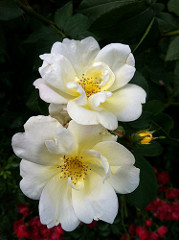

In [7]:
print(dataList[3])
roses = glob(dataList[3] + '/*.jpg')
PIL.Image.open(str(roses[0]))

#### [미션] 각 폴더단위로 jpg 데이터가 몇개씩 있는지 출력하고 각 폴더별 6개씩만 이미지 파일 출력해보기
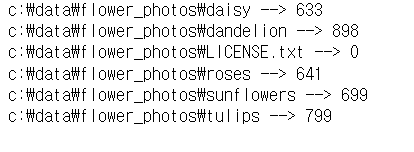

In [43]:
### 폴더단위로 jpg 몇개씩 있는지 확인해보기
for x in dataList:
    print(x, '-->', len(glob(x+'/*.jpg')))

c:\data\flower_photos\daisy --> 633
c:\data\flower_photos\dandelion --> 898
c:\data\flower_photos\LICENSE.txt --> 0
c:\data\flower_photos\roses --> 641
c:\data\flower_photos\sunflowers --> 699
c:\data\flower_photos\tulips --> 799


daisy


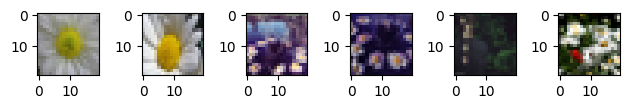

dandelion


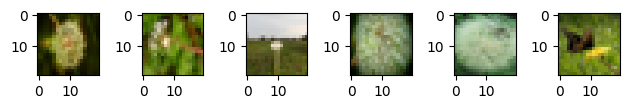

roses


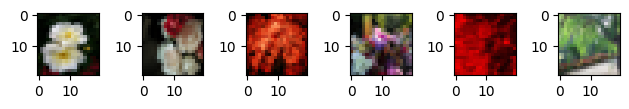

sunflowers


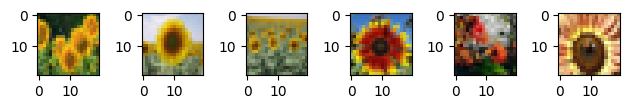

tulips


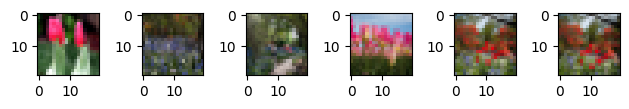

In [20]:
### 각 폴더단위로 한줄에 6개씩 이미지 출력해보기

for folder in folders:
    imgs = glob(f'{folder}/*.jpg')[:6]
    # print(imgs[0])
    for i in range(len(imgs)):
        plt.subplot(1,len(imgs), i+1)
        img = PIL.Image.open(imgs[i])
        img = img.resize((20,20))
        plt.imshow(img)
    print(folder.split('\\')[-1])
    plt.tight_layout()
    plt.show()

### [작업2] keras.preprocessing을 사용하여 로드하기
- 폴더에서 지정한 배치사이즈만큼 데이터를 읽고, 이미지의 너비높이의 크기를 조정함


In [24]:
dataList = glob('c:/data/flower_photos/*')
hap = 0
for x in dataList:
    hap = hap + len(glob(x+'/*.jpg'))
hap

3670

In [25]:
batch_size = 32
img_height = 180
img_width = 180

In [26]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 2936 files for training.


In [27]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 3670 files belonging to 5 classes.
Using 734 files for validation.


In [28]:
class_names = train_ds.class_names
print(class_names)

['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips']


### [작업3] keras.preprocessing로드 데이터 살펴보기

In [29]:
len(list(train_ds))

92

<tf.Tensor: shape=(32,), dtype=int32, numpy=
array([3, 4, 4, 4, 1, 0, 0, 1, 3, 0, 3, 4, 1, 1, 4, 2, 1, 4, 1, 2, 2, 1,
       2, 3, 4, 1, 4, 2, 1, 0, 4, 0])>

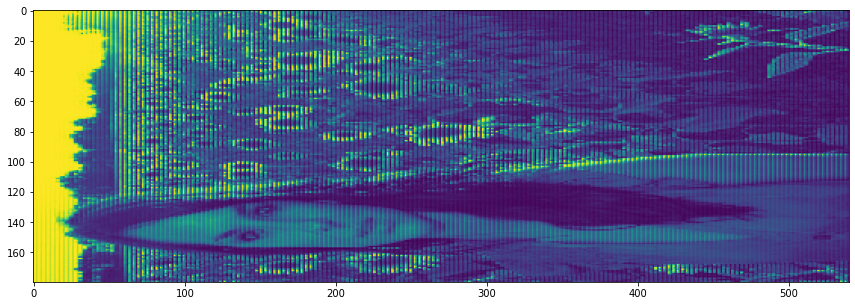

In [66]:
sample=list(train_ds)[0][0]
#sample=sample.astype('uint8')

plt.figure(figsize=(30,5))
plt.imshow(np.hstack(sample[0]))
list(train_ds)[0][1]

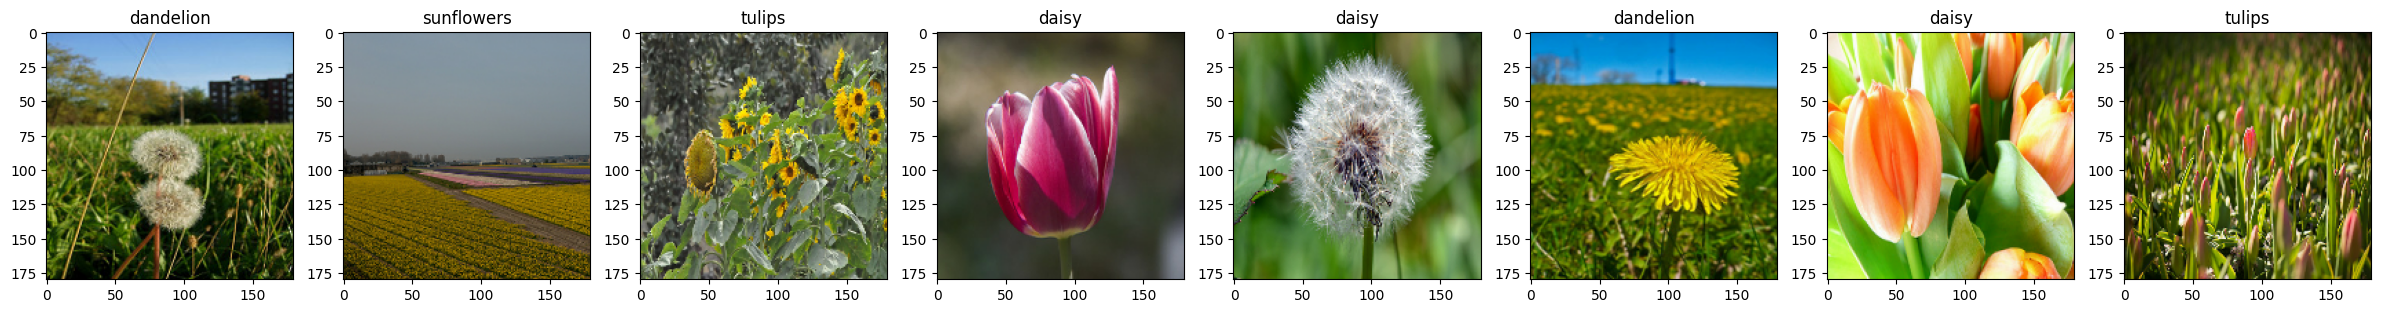

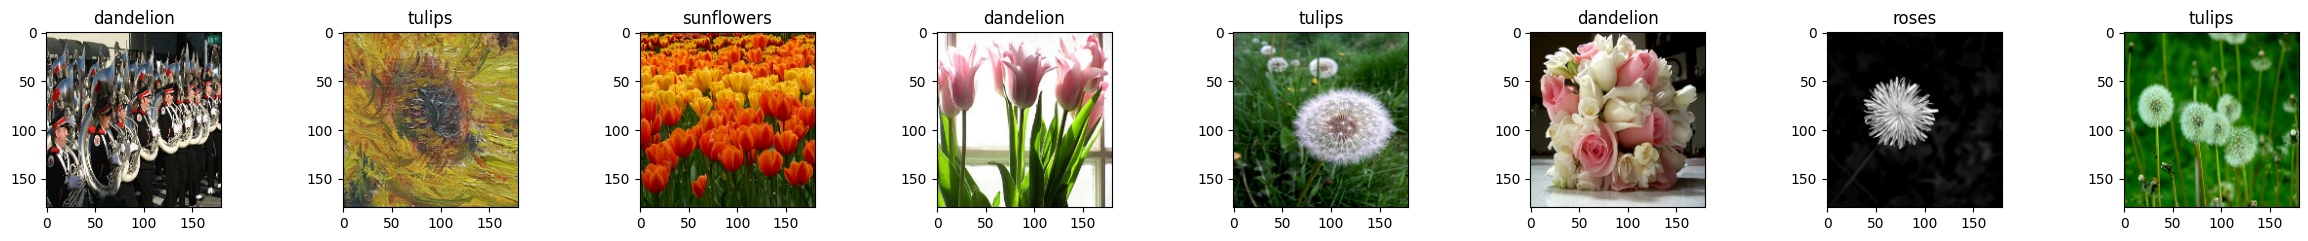

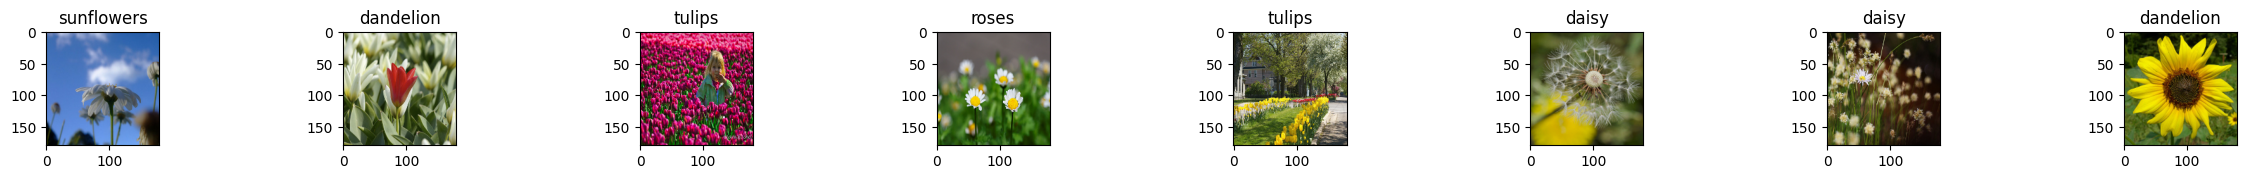

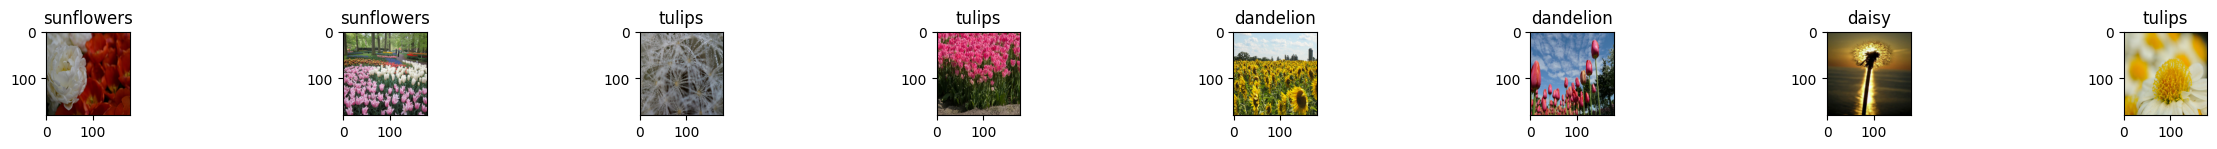

In [38]:
# 32개씩 모은 자료임
ximg=list(train_ds)[0][0]
yLabel = list(train_ds)[0][1]
ximg=np.array(sample, dtype='uint8')

cnt = 0
for row in range(1,5):
    plt.figure(figsize=(30,5))
    for col in range(1,9):
        plt.subplot(row,8,cnt+1)
        plt.imshow(ximg[cnt])
        plt.title(class_names[yLabel[cnt]])
        cnt = cnt+1

In [33]:
np.shape(ximg), np.shape(yLabel), yLabel, class_names

((32, 180, 180, 3),
 TensorShape([32]),
 <tf.Tensor: shape=(32,), dtype=int32, numpy=
 array([3, 4, 1, 2, 0, 4, 4, 1, 2, 3, 1, 1, 1, 3, 0, 4, 0, 2, 4, 4, 1, 1,
        1, 2, 3, 4, 3, 3, 0, 4, 2, 4])>,
 ['daisy', 'dandelion', 'roses', 'sunflowers', 'tulips'])

### [작업4] 모델 제작하기

In [80]:

num_classes = 5

model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy' # y값이 원-핫인코딩X
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_4 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d_3 (Conv2D)           (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 90, 90, 16)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 45, 45, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 45, 45, 64)       

In [ ]:
epochs=10
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/10
 5/92 [>.............................] - ETA: 30s - loss: 2.1982 - accuracy: 0.2812